In [1]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

### Connecting with Twitter API

In [2]:
%run ./keys.ipynb
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

### Political Sentiment:
- Dataframes of tweets of each party. 
- Dataframes of mentions of users for each party. 

- Machine learning for evalutating the sentiment of tweets and mentions.

## 1. PARTIDO POPULAR

In [3]:
# last 100 tweets of PP
pp_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='populares',
                                           tweet_mode='extended',
                                           exclude_replies=True,
                                              include_rts=False).items(1000)]

In [4]:
pp_json_response = [tweet._json for tweet in pp_tweets]
df_pp_alltweets = pd.json_normalize(pp_json_response)

In [5]:
# numerical columns pp
df_pp_alltweets.describe()

,id,retweet_count,favorite_count,user.id,user.followers_count,user.friends_count,user.listed_count,user.favourites_count,user.statuses_count,quoted_status_id,...,quoted_status.user.time_zone,quoted_status.user.statuses_count,quoted_status.user.lang,quoted_status.geo,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.quoted_status_id
count,1.000000e+03,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.00000,1.300000e+01,...,0.0,13.000000,0.0,0.0,0.0,0.0,0.0,13.000000,13.000000,1.000000e+00
mean,1.371652e+18,149.784000,334.025000,20509689.0,820454.830000,5294.0,4903.0,44505.0,102166.94800,1.316336e+18,...,NaN,132828.615385,NaN,NaN,NaN,NaN,NaN,1081.615385,2514.230769,1.367803e+18
std,6.544397e+15,209.723134,609.054161,0.0,7.164666,0.0,0.0,0.0,0.31843,1.522868e+17,...,NaN,180675.351964,NaN,NaN,NaN,NaN,NaN,1197.495549,2870.371990,NaN
min,1.359973e+18,2.000000,21.000000,20509689.0,820411.000000,5294.0,4903.0,44505.0,102165.00000,8.401146e+17,...,NaN,5386.000000,NaN,NaN,NaN,NaN,NaN,7.000000,9.000000,1.367803e+18
25%,1.366736e+18,51.000000,100.000000,20509689.0,820456.000000,5294.0,4903.0,44505.0,102167.00000,1.364287e+18,...,NaN,29191.000000,NaN,NaN,NaN,NaN,NaN,65.000000,123.000000,1.367803e+18
50%,1.371438e+18,91.000000,175.000000,20509689.0,820456.000000,5294.0,4903.0,44505.0,102167.00000,1.367837e+18,...,NaN,68234.000000,NaN,NaN,NaN,NaN,NaN,869.000000,2108.000000,1.367803e+18
75%,1.377247e+18,164.250000,329.250000,20509689.0,820456.000000,5294.0,4903.0,44505.0,102167.00000,1.379358e+18,...,NaN,118765.000000,NaN,NaN,NaN,NaN,NaN,1241.000000,2660.000000,1.367803e+18
max,1.382321e+18,2433.000000,8597.000000,20509689.0,820456.000000,5294.0,4903.0,44505.0,102167.00000,1.380838e+18,...,NaN,616775.000000,NaN,NaN,NaN,NaN,NaN,3335.000000,9363.000000,1.367803e+18


In [6]:
df_pp_alltweets

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,quoted_status.quoted_status_permalink.url,quoted_status.quoted_status_permalink.expanded,quoted_status.quoted_status_permalink.display
0,Wed Apr 14 13:14:44 +0000 2021,1382321423134380032,1382321423134380032,“Se acaba la sesión y no sabemos si el Gobiern...,False,"[0, 211]","<a href=""https://www.twitter.com/"" rel=""nofoll...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed Apr 14 13:13:40 +0000 2021,1382321155537788930,1382321155537788930,La gestión de la ministra de Trabajo: 6 millon...,False,"[0, 188]","<a href=""https://www.twitter.com/"" rel=""nofoll...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wed Apr 14 13:11:06 +0000 2021,1382320509317169154,1382320509317169154,“Teniendo en cuenta que 1 de cada 4 españoles ...,False,"[0, 237]","<a href=""https://www.twitter.com/"" rel=""nofoll...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wed Apr 14 12:53:34 +0000 2021,1382316098863923200,1382316098863923200,"- Sánchez: ""Todo bien"".\n- Realidad: \n\n❌ Mal...",False,"[0, 242]","<a href=""https://www.twitter.com/"" rel=""nofoll...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wed Apr 14 12:23:14 +0000 2021,1382308462676312067,1382308462676312067,🤝 Pablo Casado propone a Pedro Sánchez vacunar...,False,"[0, 126]","<a href=""https://www.twitter.com/"" rel=""nofoll...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Thu Feb 11 22:06:15 +0000 2021,1359987136834002944,1359987136834002944,🔴 La especialidad de Illa es mentir. Lo hacía ...,False,"[0, 107]","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Thu Feb 11 21:50:55 +0000 2021,1359983276530814982,1359983276530814982,"Santiago Abascal, 21 de mayo de 2020👉 “Nos imp...",False,"[0, 219]","<a href=""https://www.twitter.com/"" rel=""nofoll...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,Thu Feb 11 21:32:49 +0000 2021,1359978721587912707,1359978721587912707,“Cuando el señor Illa hace predicciones es com...,False,"[0, 144]","<a href=""https://www.twitter.com/"" rel=""nofoll...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Thu Feb 11 21:28:03 +0000 2021,1359977524609048584,1359977524609048584,“Vd. ha pedido a la ciudadanía unos enormes sa...,False,"[0, 278]","<a href=""https://www.twitter.com/"" rel=""nofoll...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# now, we select just the columns that are important for our analysis:

columns_selected = ['user.name', 'created_at', 'id', 'full_text', 'display_text_range', 
                    'source', 'retweet_count', 'favorite_count', 'user.followers_count', 
                    'user.friends_count', 'user.statuses_count', 'entities.hashtags', 'entities.urls']

In [8]:
df_pp = df_pp_alltweets[columns_selected]

In [9]:
#df_pp.loc[:, 'created_at'] = df_pp['created_at'].apply(transforming_format_dates)

In [10]:
#df_pp['source'] = cleaning_source(df_pp['source'])

In [11]:
df_pp

,user.name,created_at,id,full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Partido Popular,Wed Apr 14 13:14:44 +0000 2021,1382321423134380032,“Se acaba la sesión y no sabemos si el Gobiern...,"[0, 211]","<a href=""https://www.twitter.com/"" rel=""nofoll...",49,91,820456,5294,102167,"[{'text': 'SesiónDeControl', 'indices': [195, ...",[]
1,Partido Popular,Wed Apr 14 13:13:40 +0000 2021,1382321155537788930,La gestión de la ministra de Trabajo: 6 millon...,"[0, 188]","<a href=""https://www.twitter.com/"" rel=""nofoll...",101,181,820456,5294,102167,"[{'text': 'SesiónDeControl', 'indices': [172, ...",[]
2,Partido Popular,Wed Apr 14 13:11:06 +0000 2021,1382320509317169154,“Teniendo en cuenta que 1 de cada 4 españoles ...,"[0, 237]","<a href=""https://www.twitter.com/"" rel=""nofoll...",66,140,820456,5294,102167,"[{'text': 'SesiónDeControl', 'indices': [221, ...",[]
3,Partido Popular,Wed Apr 14 12:53:34 +0000 2021,1382316098863923200,"- Sánchez: ""Todo bien"".\n- Realidad: \n\n❌ Mal...","[0, 242]","<a href=""https://www.twitter.com/"" rel=""nofoll...",107,169,820456,5294,102167,[],[]
4,Partido Popular,Wed Apr 14 12:23:14 +0000 2021,1382308462676312067,🤝 Pablo Casado propone a Pedro Sánchez vacunar...,"[0, 126]","<a href=""https://www.twitter.com/"" rel=""nofoll...",115,243,820456,5294,102167,"[{'text': 'VacunaCOVID19', 'indices': [112, 12...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Partido Popular,Thu Feb 11 22:06:15 +0000 2021,1359987136834002944,🔴 La especialidad de Illa es mentir. Lo hacía ...,"[0, 107]","<a href=""https://mobile.twitter.com"" rel=""nofo...",394,840,820456,5294,102167,"[{'text': 'L6ElDebat', 'indices': [97, 107]}]",[]
996,Partido Popular,Thu Feb 11 21:50:55 +0000 2021,1359983276530814982,"Santiago Abascal, 21 de mayo de 2020👉 “Nos imp...","[0, 219]","<a href=""https://www.twitter.com/"" rel=""nofoll...",247,403,820456,5294,102167,"[{'text': 'L6ElDebat', 'indices': [209, 219]}]",[]
997,Partido Popular,Thu Feb 11 21:32:49 +0000 2021,1359978721587912707,“Cuando el señor Illa hace predicciones es com...,"[0, 144]","<a href=""https://www.twitter.com/"" rel=""nofoll...",186,359,820456,5294,102167,"[{'text': 'L6ElDebat', 'indices': [134, 144]}]",[]
998,Partido Popular,Thu Feb 11 21:28:03 +0000 2021,1359977524609048584,“Vd. ha pedido a la ciudadanía unos enormes sa...,"[0, 278]","<a href=""https://www.twitter.com/"" rel=""nofoll...",283,568,820456,5294,102167,"[{'text': 'L6elDebat', 'indices': [268, 278]}]",[]


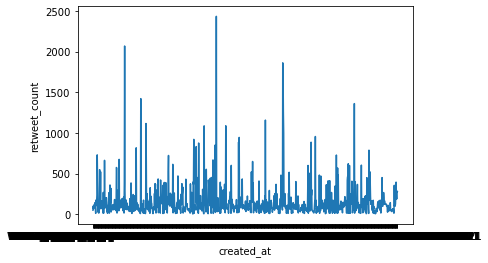

In [12]:
# visualization
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(data=df_pp, x='created_at', y='retweet_count')

In [13]:
# rts, favs por día.
daily_results_pp = df_pp.groupby('created_at', as_index=False).sum()
daily_results_pp

,created_at,id,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count
0,Fri Apr 02 06:01:17 +0000 2021,1377863687294349312,8,33,820456,5294,102167
1,Fri Apr 02 08:39:54 +0000 2021,1377903604229636096,354,864,820456,5294,102167
2,Fri Apr 02 09:25:25 +0000 2021,1377915059310010368,122,198,820456,5294,102167
3,Fri Apr 02 10:49:56 +0000 2021,1377936329590341632,158,373,820456,5294,102167
4,Fri Apr 02 10:54:46 +0000 2021,1377937545342894080,135,414,820456,5294,102167
...,...,...,...,...,...,...,...
995,Wed Mar 31 14:59:07 +0000 2021,1377274263514779648,225,474,820456,5294,102167
996,Wed Mar 31 15:09:56 +0000 2021,1377276984473059328,722,727,820456,5294,102167
997,Wed Mar 31 16:40:40 +0000 2021,1377299820369567744,522,848,820456,5294,102167
998,Wed Mar 31 16:47:21 +0000 2021,1377301499060047872,114,255,820456,5294,102167


## 2. PSOE

In [14]:
# last 100 tweets of PSOE
psoe_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='psoe',
                                           tweet_mode='extended',
                                           exclude_replies=True,
                                               include_rts=False).items(1000)]

In [15]:
psoe_json_response = [tweet._json for tweet in psoe_tweets]
df_psoe_alltweets = pd.json_normalize(psoe_json_response)

In [16]:
df_psoe_alltweets.shape

(1000, 164)

In [17]:
df_psoe = df_psoe_alltweets[columns_selected]

In [19]:
df_psoe.shape

(1000, 13)

## 3. PODEMOS

In [20]:
# last 1000 tweets of PODEMOS
podemos_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='podemos',
                                           tweet_mode='extended',
                                           exclude_replies=True,
                                                  include_rts=False).items(1000)]

podemos_json_response = [tweet._json for tweet in podemos_tweets]
df_podemos_alltweets = pd.json_normalize(podemos_json_response)

In [21]:
df_podemos = df_podemos_alltweets[columns_selected]

## 4. CUIDADANOS

In [22]:
# last 100 tweets of Ciudadanos
ciudadanos_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='ciudadanoscs',
                                           tweet_mode='extended',
                                           exclude_replies=True,
                                                     include_rts=False).items(1000)]

ciudadanos_json_response = [tweet._json for tweet in ciudadanos_tweets]
df_ciudadanos_alltweets = pd.json_normalize(ciudadanos_json_response)

In [23]:
df_ciudadanos = df_ciudadanos_alltweets[columns_selected]

## 5. VOX

In [24]:
# last 1000 tweets of VOX
vox_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='vox_es',
                                           tweet_mode='extended',
                                           exclude_replies=True,
                                              include_rts=False).items(1000)]

vox_json_response = [tweet._json for tweet in vox_tweets]
df_vox_alltweets = pd.json_normalize(vox_json_response)

In [25]:
df_vox = df_vox_alltweets[columns_selected]

## All together

In [26]:
frames = [df_pp, df_psoe, df_ciudadanos, df_podemos, df_vox ]
df_final = pd.concat(frames)

In [27]:
df_final.shape

(4676, 13)

In [28]:
df_final.head(3)

,user.name,created_at,id,full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Partido Popular,Wed Apr 14 13:14:44 +0000 2021,1382321423134380032,“Se acaba la sesión y no sabemos si el Gobiern...,"[0, 211]","<a href=""https://www.twitter.com/"" rel=""nofoll...",49,91,820456,5294,102167,"[{'text': 'SesiónDeControl', 'indices': [195, ...",[]
1,Partido Popular,Wed Apr 14 13:13:40 +0000 2021,1382321155537788930,La gestión de la ministra de Trabajo: 6 millon...,"[0, 188]","<a href=""https://www.twitter.com/"" rel=""nofoll...",101,181,820456,5294,102167,"[{'text': 'SesiónDeControl', 'indices': [172, ...",[]
2,Partido Popular,Wed Apr 14 13:11:06 +0000 2021,1382320509317169154,“Teniendo en cuenta que 1 de cada 4 españoles ...,"[0, 237]","<a href=""https://www.twitter.com/"" rel=""nofoll...",66,140,820456,5294,102167,"[{'text': 'SesiónDeControl', 'indices': [221, ...",[]


## Cleaning the final dataframe

In [29]:
# date format. 

def transforming_format_dates(column):
    return pd.to_datetime(column)

In [37]:
df_final['created_at'] = transforming_format_dates(df_final['created_at'])

In [38]:
df_final

,user.name,created_at,id,full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Partido Popular,2021-04-14 13:14:44+00:00,1382321423134380032,“Se acaba la sesión y no sabemos si el Gobiern...,"[0, 211]","<a href=""https://www.twitter.com/"" rel=""nofoll...",49,91,820456,5294,102167,"[{'text': 'SesiónDeControl', 'indices': [195, ...",[]
1,Partido Popular,2021-04-14 13:13:40+00:00,1382321155537788930,La gestión de la ministra de Trabajo: 6 millon...,"[0, 188]","<a href=""https://www.twitter.com/"" rel=""nofoll...",101,181,820456,5294,102167,"[{'text': 'SesiónDeControl', 'indices': [172, ...",[]
2,Partido Popular,2021-04-14 13:11:06+00:00,1382320509317169154,“Teniendo en cuenta que 1 de cada 4 españoles ...,"[0, 237]","<a href=""https://www.twitter.com/"" rel=""nofoll...",66,140,820456,5294,102167,"[{'text': 'SesiónDeControl', 'indices': [221, ...",[]
3,Partido Popular,2021-04-14 12:53:34+00:00,1382316098863923200,"- Sánchez: ""Todo bien"".\n- Realidad: \n\n❌ Mal...","[0, 242]","<a href=""https://www.twitter.com/"" rel=""nofoll...",107,169,820456,5294,102167,[],[]
4,Partido Popular,2021-04-14 12:23:14+00:00,1382308462676312067,🤝 Pablo Casado propone a Pedro Sánchez vacunar...,"[0, 126]","<a href=""https://www.twitter.com/"" rel=""nofoll...",115,243,820456,5294,102167,"[{'text': 'VacunaCOVID19', 'indices': [112, 12...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,VOX 🇪🇸,2020-12-11 17:17:54+00:00,1337446525820145666,La trama. https://t.co/8PlhrO3Nr4 https://t.co...,"[0, 33]","<a href=""http://twitter.com/download/android"" ...",2234,5793,438318,1257,55447,[],"[{'url': 'https://t.co/8PlhrO3Nr4', 'expanded_..."
672,VOX 🇪🇸,2020-12-11 14:28:14+00:00,1337403825867644928,⚠️ Un grupo de diez inmigrantes magrebíes pega...,"[0, 272]","<a href=""http://twitter.com/download/android"" ...",2776,5220,438318,1257,55447,[],[]
673,VOX 🇪🇸,2020-12-11 13:32:41+00:00,1337389848169164800,Toni Bolaño no insulta a VOX.\n\nInsulta a los...,"[0, 269]","<a href=""https://mobile.twitter.com"" rel=""nofo...",542,1463,438318,1257,55447,[],[]
674,VOX 🇪🇸,2020-12-11 13:28:55+00:00,1337388899052773376,"🔴 @ivanedlm en Barcelona:\n\n""Con la presencia...","[0, 236]","<a href=""https://studio.twitter.com"" rel=""nofo...",334,1044,438318,1257,55447,"[{'text': 'RecuperemosCataluña', 'indices': [2...",[]


In [36]:
# cleaning source column 

def cleaning_source(column):
    
    list_sources = list(column)
    
    sources_clean = [re.findall(r'\>(.*?)\<', s) for s in list_sources]
        
    return sources_clean

In [39]:
df_final['source'] = cleaning_source(df_final['source'])

In [41]:
df_final.to_csv('../data/processed/df_final_v1.csv')